In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline
import librosa
import librosa.display
import pylab
import os
import matplotlib.image as mpimg

from sklearn.mixture import GaussianMixture


### Mel Spectrogram

##### librosa.feature.melspectrogram

INPUT - If a time-series input y, sr is provided
Internal Steps :
* y's magnitude spectrogram S is first computed
* then mapped onto the mel scale by mel_f.dot(S**power). By default, power=2 operates on a power spectrum. 


Other Parameters
* n_fft:  length of FFT window
* hop_length:  number of samples between successive frames
* power: 1(energy) or 2(power) and so on...



# BEGIN FROM HERE!!

## TAKING WHOLE SONG AT THE SAME TIME WITH 1 MIN SECTIONS

In [2]:
audio_path = 'music.mp3'
duration = 60
offset = 0
n_components= 40
covariance_type = 'tied'

In [25]:
def train_sample_audio(duration, audio_path, returnModel = True):
    offset = 0
    count = 0
    
    while(True):
        # load sampled audio
        y, sr = librosa.load(audio_path, mono =True, offset = offset, duration = duration)
        
        # in case the song ends
        length = librosa.get_duration(y, sr)
            
        if(y.size == 0):
            break
      
        print "AUDIO PART",count+1,":\n Starting point:", offset,"  Ending point:", offset + np.around(length,2)
       
        # Spectrogram
        S = librosa.feature.melspectrogram(y, sr=sr, n_fft=4096, hop_length=256)
        logS = librosa.power_to_db(S, ref=np.max)
        
        # Apply Guassian Mixture model
        gmm = GaussianMixture(n_components = n_components, covariance_type = covariance_type)
        gmm.fit(logS)
        
        # Move to next audio slice
        offset = offset + duration
        
        
        # If successful print DONE
        print " Done!"
        count += 1
        
    print("GMM TRAINING SUCCESSFUL!")
    
    return gmm
                    
        
gmm_rap = train_sample_audio(duration, audio_path)

AUDIO PART 1 :
 Starting point: 0   Ending point: 60.0
 Done!
AUDIO PART 2 :
 Starting point: 60   Ending point: 120.0
 Done!
AUDIO PART 3 :
 Starting point: 120   Ending point: 180.0
 Done!
AUDIO PART 4 :
 Starting point: 180   Ending point: 222.09
 Done!
GMM TRAINING SUCCESSFUL!


In [4]:
# DUMMY DATASET CREATION
data_rap, labels_rap = gmm_rap.sample(n_samples=40)

In [26]:
data_rap.shape

(40L, 3626L)

In [6]:
labels_rap.shape

(40L,)

In [7]:
X = data_rap

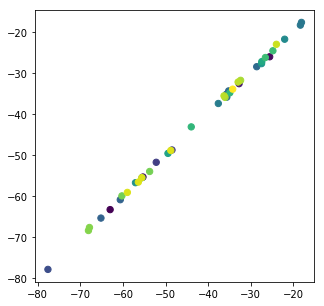

In [8]:
plt.figure(figsize=(5,5))
# plt.axis([-80.005,-79.995,-80.005,-79.995])
plt.scatter(X[:, 0], X[:, 1], c=labels_rap, s=40, cmap='viridis');

In [28]:
gmm_mnm = train_sample_audio(duration, 'music1.mp3')

AUDIO PART 1 :
 Starting point: 0   Ending point: 60.0
 Done!
AUDIO PART 2 :
 Starting point: 60   Ending point: 120.0
 Done!
AUDIO PART 3 :
 Starting point: 120   Ending point: 180.0
 Done!
AUDIO PART 4 :
 Starting point: 180   Ending point: 240.0
 Done!
AUDIO PART 5 :
 Starting point: 240   Ending point: 297.95
 Done!
GMM TRAINING SUCCESSFUL!


In [29]:
# DUMMY DATASET CREATION
data_mnm, labels_mnm = gmm_mnm.sample(n_samples=40)

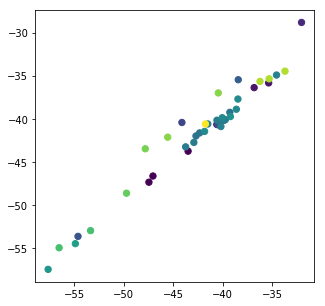

In [30]:
plt.figure(figsize=(5,5))
# plt.axis([-80.005,-79.995,-80.005,-79.995])
plt.scatter(data_mnm[:, 0], data_mnm[:, 1], c=labels_mnm, s=40, cmap='viridis');

In [32]:
gmm_rap.score(data_rap)

-5300161634.5707035

### Resizing isn't a good way to do this. Require a generis solution.
### Find a way to limit features extracted from GMM

In [34]:
data_mnm.resize((40L, 3626L))

In [35]:
data_mnm.shape

(40L, 3626L)

In [36]:
gmm_rap.score(data_mnm)

-251197679150.23608

In [68]:
gmm_icky.score(data_rap)

-2669615794.8062572

In [83]:
gmm_eminem = train_sample_audio(duration, 'music1.mp3')

AUDIO PART 1 :
 Starting point: 0   Ending point: 60
 Done!
AUDIO PART 2 :
 Starting point: 60   Ending point: 120
 Done!
AUDIO PART 3 :
 Starting point: 120   Ending point: 180
 Done!
AUDIO PART 4 :
 Starting point: 180   Ending point: 240
 Done!
AUDIO PART 5 :
 Starting point: 240   Ending point: 300
 Done!
GMM TRAINING SUCCESSFUL!


In [70]:
data_eminem, labels_eminem = gmm_eminem.sample(n_samples=40)

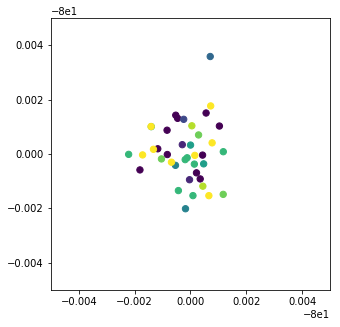

In [71]:
plt.figure(figsize=(5,5))
plt.axis([-80.005,-79.995,-80.005,-79.995])
plt.scatter(X[:, 0], X[:, 1], c=labels_rap, s=40, cmap='viridis');

In [72]:
gmm_rap.score_samples(data_eminem)

array([ -3.04948794e+09,  -4.65821052e+09,  -1.64679790e+09,
        -1.14908256e+09,  -1.40719164e+09,  -1.64304290e+09,
        -5.07833114e+09,  -4.45818301e+09,  -3.28558741e+09,
        -1.67557619e+09,  -3.05997248e+09,  -2.43385999e+09,
        -4.98154900e+09,  -5.37967081e+09,  -3.63439655e+09,
        -1.69717527e+09,  -1.17112748e+09,  -2.12321952e+09,
        -2.40106095e+09,  -2.84625714e+09,  -1.36685532e+09,
        -1.67242456e+09,  -2.51796186e+09,  -1.80327981e+09,
        -9.19365713e+08,  -1.12404346e+09,  -6.81676498e+09,
        -7.71553466e+08,  -4.20092199e+09,  -2.84307762e+09,
        -1.17987210e+09,  -9.30150449e+09,  -4.58752462e+09,
        -4.77524913e+09,  -1.90883299e+09,  -1.32447105e+09,
        -3.46814524e+09,  -1.48091204e+09,  -6.08374547e+09,
        -2.26270460e+09])

In [73]:
gmm_rap.score(data_eminem)

-2954724772.6294441

#### IGNORE BELOW

#DOUBT:
This doesn't make sense.
Two rap songs by the same singer give negative score. I am not understanding why it worked this way.

In [ ]:
y_rap, sr_rap = librosa.load('music2.mp3', mono =True, offset = offset, duration = duration)

In [37]:
def test_sample_audio(duration, audio_path):
    offset = 0
    count = 0
    
    while(True):
        # load sampled audio
        y, sr = librosa.load(audio_path, mono =True, offset = offset, duration = duration)
        
        # in case the song ends
        if(y.size == 0):
            break
        
        print "AUDIO PART",count+1,":\n Starting point:", offset,"  Ending point:", offset + duration
       
        # Spectrogram
        S = librosa.feature.melspectrogram(y, sr=sr, n_fft=4096, hop_length=256)
        logS = librosa.power_to_db(S, ref=np.max)
        
        # Apply Guassian Mixture model
#         gmm_rap = GaussianMixture(n_components = n_components, covariance_type = covariance_type)
#         gmm_rap.fit(logS)
        score = gmm.score(logS)
        print "SCORE",score
        
        # Move to next audio slice
        offset = offset + duration
        
        
        # If successful print DONE
        print " Done!"
        count += 1
        
    print("GMM TESTING SUCCESSFUL!")
                    
        
# test_sample_audio(60,'music3.mp3')


## WILL FIX THE ERROR IN A BIT

In [106]:
# y, sr = librosa.load('music3.mp3', mono =True)
# ipd.Audio(y, rate=sr)

In [ ]:
## IGNORE BELOW

In [ ]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=4096, hop_length=256)
logS = librosa.power_to_db(S, ref=np.max)

In [ ]:
##### 

In [69]:
# data

In [24]:
from sklearn.mixture import GaussianMixture

In [44]:
gmm_rap = GaussianMixture(n_components=10, covariance_type = 'tied')

In [26]:
gmm_rap.fit(logS)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)